# Week 6: Descriptive Statistics and Data Visualization

## DSUA111: Data Science for Everyone, NYU, Fall 2020

### TA Jeff, `jpj251@nyu.edu`

* This slideshow: https://jjacobs.me/dsua111-sections/week-06
* All materials: https://github.com/jpowerj/dsua111-sections

## Overview

0. Quick Pandas Recap
1. Variable Types
2. Frequency/Central Tendency
3. Dispersion and Position

[Visualization: sprinkled throughout]

## Pandas Recap

Where we left off...

In [1]:
import pandas as pd
gift_df = pd.read_csv("ForeignGifts_Universities.csv")

In [2]:
try:
    gift_df['amount_cleaned'] = gift_df['Foreign Gift Amount'].str.replace("$","").str.replace(",","")
except Exception as e:
    print(e)

In [3]:
gift_df['amount_cleaned'] = gift_df['Foreign Gift Amount'].str.replace("(","").str.replace(")","").str.replace("$","").str.replace(",","")

In [4]:
gift_df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name,amount_cleaned
0,1,107000,Thunderbird School of Global Management,Glendale,AZ,12/12/2012,"$1,220,000.00",Contract,MEXICO,Instituto Technologico y de Estudio,1220000.00
1,2,107000,Thunderbird School of Global Management,Glendale,AZ,11/26/2012,"$395,790.00",Contract,CHINA,Intel Products (Chengdu) LTD,395790.00
2,3,107000,Thunderbird School of Global Management,Glendale,AZ,11/19/2012,"$2,769,651.00",Contract,SAUDI ARABIA,Saudi Basic Industries Corporation,2769651.00
3,4,107000,Thunderbird School of Global Management,Glendale,AZ,7/31/2012,"$364,128.00",Contract,KUWAIT,Kuwait National Petroleum CO,364128.00
4,5,108100,Arizona State University,Tempe,AZ,12/29/2017,"$180,000.00",Contract,THE NETHERLANDS,Airbus Group SE,180000.00


In [5]:
gift_df.dtypes

ID                             int64
OPEID                          int64
Institution Name              object
City                          object
State                         object
Foreign Gift Received Date    object
Foreign Gift Amount           object
Gift Type                     object
Country of Giftor             object
Giftor Name                   object
amount_cleaned                object
dtype: object

In [6]:
gift_df['amount_cleaned'] = gift_df['amount_cleaned'].astype(float)

In [7]:
gift_df.dtypes

ID                              int64
OPEID                           int64
Institution Name               object
City                           object
State                          object
Foreign Gift Received Date     object
Foreign Gift Amount            object
Gift Type                      object
Country of Giftor              object
Giftor Name                    object
amount_cleaned                float64
dtype: object

## Variable Types

<center>
<img src="var_types.png" style="width:80%; align:center;">
</center>

(Lecture 9.1, Slide 9)

## Variable Types?

**Gift Amount?** (the cleaned version)

In [8]:
gift_df['amount_cleaned']

0         1220000.0
1          395790.0
2         2769651.0
3          364128.0
4          180000.0
            ...    
18381      163958.0
18382      163958.0
18383      350000.0
18384    21532410.0
18385      375000.0
Name: amount_cleaned, Length: 18386, dtype: float64

**`amount_cleaned`** is **Numeric**, **Continuous**

(Why not discrete?)

**Number of letters in institution name?**

In [9]:
gift_df['institution_length'] = gift_df['Institution Name'].apply(len)

In [10]:
gift_df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name,amount_cleaned,institution_length
0,1,107000,Thunderbird School of Global Management,Glendale,AZ,12/12/2012,"$1,220,000.00",Contract,MEXICO,Instituto Technologico y de Estudio,1220000.0,39
1,2,107000,Thunderbird School of Global Management,Glendale,AZ,11/26/2012,"$395,790.00",Contract,CHINA,Intel Products (Chengdu) LTD,395790.0,39
2,3,107000,Thunderbird School of Global Management,Glendale,AZ,11/19/2012,"$2,769,651.00",Contract,SAUDI ARABIA,Saudi Basic Industries Corporation,2769651.0,39
3,4,107000,Thunderbird School of Global Management,Glendale,AZ,7/31/2012,"$364,128.00",Contract,KUWAIT,Kuwait National Petroleum CO,364128.0,39
4,5,108100,Arizona State University,Tempe,AZ,12/29/2017,"$180,000.00",Contract,THE NETHERLANDS,Airbus Group SE,180000.0,24


**`institution_length`** is **Numeric**, **Discrete**

**Name of Institution?**

In [11]:
gift_df['Institution Name']

0                 Thunderbird School of Global Management
1                 Thunderbird School of Global Management
2                 Thunderbird School of Global Management
3                 Thunderbird School of Global Management
4                                Arizona State University
                               ...                       
18381    Keck Graduate Institute of Applied Life Sciences
18382    Keck Graduate Institute of Applied Life Sciences
18383    Keck Graduate Institute of Applied Life Sciences
18384                  Hult International Business School
18385         California Institute of Advanced Management
Name: Institution Name, Length: 18386, dtype: object

**`Institution Name`** is **Categorical**, **Nominal**

**Rank of the gift?** (1=largest, 2=second-largest, ...)

In [12]:
gift_df['gift_rank'] = gift_df['amount_cleaned'].rank(method='min', ascending=False).astype(int)

In [13]:
gift_df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name,amount_cleaned,institution_length,gift_rank
0,1,107000,Thunderbird School of Global Management,Glendale,AZ,12/12/2012,"$1,220,000.00",Contract,MEXICO,Instituto Technologico y de Estudio,1220000.0,39,1139
1,2,107000,Thunderbird School of Global Management,Glendale,AZ,11/26/2012,"$395,790.00",Contract,CHINA,Intel Products (Chengdu) LTD,395790.0,39,3822
2,3,107000,Thunderbird School of Global Management,Glendale,AZ,11/19/2012,"$2,769,651.00",Contract,SAUDI ARABIA,Saudi Basic Industries Corporation,2769651.0,39,528
3,4,107000,Thunderbird School of Global Management,Glendale,AZ,7/31/2012,"$364,128.00",Contract,KUWAIT,Kuwait National Petroleum CO,364128.0,39,4081
4,5,108100,Arizona State University,Tempe,AZ,12/29/2017,"$180,000.00",Contract,THE NETHERLANDS,Airbus Group SE,180000.0,24,6660


In [14]:
gift_df.sort_values(by='gift_rank').head(5)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name,amount_cleaned,institution_length,gift_rank
16386,16387,324200,Carnegie Mellon University,Pittsburgh,PA,1/1/2015,"$77,391,377.00",Contract,QATAR,Qatar Foundation for Education,77391377.0,26,1
16343,16344,324200,Carnegie Mellon University,Pittsburgh,PA,2/16/2016,"$75,000,000.00",Contract,BERMUDA,NaN,75000000.0,26,2
16345,16346,324200,Carnegie Mellon University,Pittsburgh,PA,2/16/2016,"$75,000,000.00",Contract,BERMUDA,NaN,75000000.0,26,2
16346,16347,324200,Carnegie Mellon University,Pittsburgh,PA,2/16/2016,"$75,000,000.00",Contract,BERMUDA,NaN,75000000.0,26,2
16347,16348,324200,Carnegie Mellon University,Pittsburgh,PA,2/16/2016,"$75,000,000.00",Contract,BERMUDA,NaN,75000000.0,26,2


**`gift_rank`** is **Categorical**, **Ordinal**

## Measures of Frequency

In [15]:
gift_df['Institution Name'].value_counts().head(10)

University of California, Los Angeles          3206
California Institute of Technology             3127
Johns Hopkins University                       1157
Columbia University in the City of New York     791
Ohio State University (The)                     681
University of Michigan - Ann Arbor              630
Stanford University                             518
Harvard University                              513
Babson College                                  378
Saint John's University                         332
Name: Institution Name, dtype: int64

In [16]:
gift_df['Institution Name'].value_counts(normalize=True).head(10)

University of California, Los Angeles          0.174372
California Institute of Technology             0.170075
Johns Hopkins University                       0.062928
Columbia University in the City of New York    0.043022
Ohio State University (The)                    0.037039
University of Michigan - Ann Arbor             0.034265
Stanford University                            0.028174
Harvard University                             0.027902
Babson College                                 0.020559
Saint John's University                        0.018057
Name: Institution Name, dtype: float64

In [17]:
gift_df['Country of Giftor'].value_counts().head(10)

ENGLAND         2490
CANADA          1885
JAPAN           1540
CHINA           1297
FRANCE          1130
SWITZERLAND     1124
GERMANY         1025
HONG KONG        675
SAUDI ARABIA     627
SOUTH KOREA      441
Name: Country of Giftor, dtype: int64

In [18]:
gift_df['Country of Giftor'].value_counts(normalize=True).head(10)

ENGLAND         0.135429
CANADA          0.102524
JAPAN           0.083759
CHINA           0.070543
FRANCE          0.061460
SWITZERLAND     0.061133
GERMANY         0.055749
HONG KONG       0.036713
SAUDI ARABIA    0.034102
SOUTH KOREA     0.023986
Name: Country of Giftor, dtype: float64

## Measures of Central Tendency

In [19]:
gift_df['amount_cleaned'].describe()

count    1.838600e+04
mean     5.014007e+05
std      2.760354e+06
min      0.000000e+00
25%      2.419250e+03
50%      6.000000e+04
75%      3.171265e+05
max      7.739138e+07
Name: amount_cleaned, dtype: float64

https://www.google.com/search?client=firefox-b-1-d&q=pandas+describe+format

https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

In [20]:
gift_df['amount_cleaned'].describe().apply(lambda x: format(x, 'f'))

count       18386.000000
mean       501400.674535
std       2760353.536498
min             0.000000
25%          2419.250000
50%         60000.000000
75%        317126.500000
max      77391377.000000
Name: amount_cleaned, dtype: object

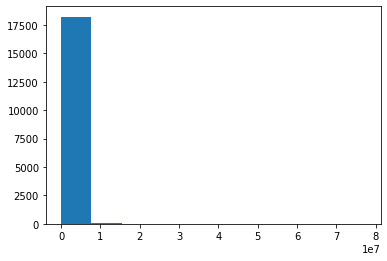

In [21]:
import matplotlib.pyplot as plt
plt.hist(gift_df['amount_cleaned'])
plt.show()

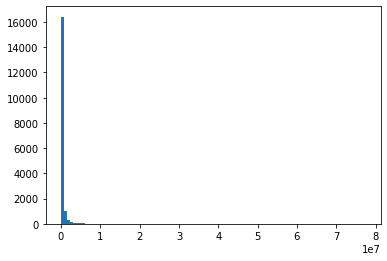

In [22]:
plt.hist(gift_df['amount_cleaned'], bins=100)
plt.show()

In [23]:
import numpy as np
gift_df['log_amount'] = gift_df['amount_cleaned'].apply(np.log)

In [24]:
gift_df[gift_df['log_amount'] == -np.inf] = np.nan

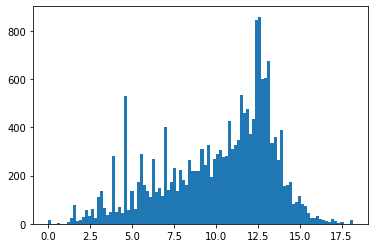

In [25]:
plt.hist(gift_df['log_amount'], bins=100)
plt.show()

In [26]:
np.exp(13.125)

501320.0507709557

## But... BEWARE!

<center>
<img src="mean_beware.png" style="width:80%;align:center">
</center>

(Lecture 9.1. Slide 6)

## and... BEWARE!

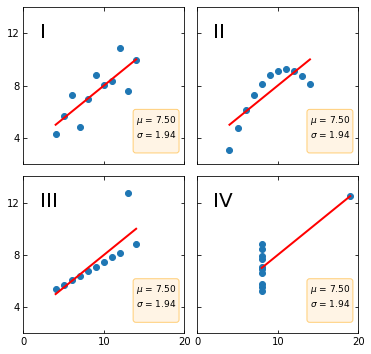

In [27]:
import anscombe
anscombe.plot_anscombe()

("Anscombe's Quartet": https://en.wikipedia.org/wiki/Anscombe%27s_quartet )

## Measures of Dispersion

In [28]:
gift_df['amount_cleaned'].var()

7622759151302.67

**Variance** in words: the average squared distance from the mean

But... why do we square it?

In [29]:
my_df = pd.DataFrame({'x':[1,2,3,4,5,6],'y':[1,2,3,-1,-2,-3]})

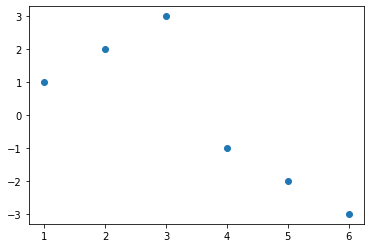

In [30]:
plt.scatter(my_df['x'], my_df['y']); plt.show()

In [31]:
y_mean = my_df['y'].mean(); y_mean

0.0

In [32]:
my_df['y'].std()

2.3664319132398464

In [33]:
(my_df['y'] - y_mean).mean()

0.0

<center>
<img src="oh_no.png" style="width:66.6%;">
</center>

## And why *both* standard deviation and variance?

* Simple answer: standard deviation is in the same units as the variable.
* Standard deviation of gift amount is approx. $2.76 million
* Variance of gift amount is approx. 7.6 trillion ......? 

In [34]:
%%HTML
<video width="80%" controls>
      <source src="ice_cream_glove.mp4" type="video/mp4">
</video>

In [ ]:
!jupyter nbconvert Week_06.ipynb --to slides --SlidesExporter.reveal_scroll=True